In [4]:
try:
    # import gekko se instalado
    from gekko import GEKKO
except:
    # instale gekko senão
    !pip install gekko
    from gekko import GEKKO

In [5]:
# Projeto Cerberus
# Eng de Aplicação Arthur Moreno
# Data de criação: 20/02/2021

# Problema de Controle Ótimo para Subida de aeronave de um Foguete
# Minimização do tempo de subida de uma aeronave com relação deflexão de aileron

import numpy as np
import matplotlib.pyplot as plt
#from gekko import GEKKO

# Criação de um modelo do tipo GEKKO e o vetor de tempo
m = GEKKO(remote=False)
n = 101; m.time = np.linspace(0,1,n)

ksi = 0.05236
tf = m.FV(value=5, lb=1, ub=10)
tf.STATUS = 1

# Função objetivo de menor tempo de vôo
m.Minimize(tf/n)

# Variáveis de Estado
# x0 = ângulo de ataque
# x1 = ângulo de arfagem
# x2 = velocidade de arfagem
x0,x1,x2 = m.Array(m.Var,3,value=0,lb=-1,ub=1)
x0.value = 0.4655

# Sinal de Controle - ângulo da superfície de controle do aileron 
w = m.MV(value=0, lb=0, ub=1); w.STATUS=1


# Equações Dinâmicas de Vôo
m.Equation(x0.dt()/tf == -0.877*x0 + x2 - 0.088*x0*x2
           + 0.47*x0**2 - 0.019*x1**2 -x0**2*x2 + 3.846*x0**3
           -(0.215*ksi-0.28*x0**2*ksi -0.47*x0*ksi**2 - 0.63*ksi**3)*w
           -(-0.215*ksi + 0.28*x0**2 -0.47*x0*ksi**2 + 0.63*ksi**3)*(1-w))
m.Equation(x1.dt()/tf==x2)
m.Equation(x2.dt()/tf == -4.208*x0 - 0.396*x2 - 0.47*x0**2 - 3.564*x0**3
           +20.967*ksi - 6.265*x0**2*ksi + 46*x0*ksi**2 -61.4*ksi**3
           -(20.967*ksi - 6.265*x0**2*ksi - 61.4*ksi**3)*2*w)

# Condições Terminais
m.fix_final(x0,0)
m.fix_final(x1,0)
m.fix_final(x2,0)


# Opções do solver do Suíte do GEKKO
m.options.IMODE=6
m.options.SOLVER=1
m.options.MAX_ITER=1000

m.options.COLDSTART=0
m.solve()

print('Solução Ótima (tempo final): ' + str(tf.value[0]))
tm = tf.value[0]*m.time



 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            6
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:           1095
 Number of total equations: -         1000
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             95
 
 ----------------------------------------------
 Dynamic Control with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  2.50533E+05  5.44509E-01
    1  9.80504E+06  7.02892E-01
    2  2.19272E+08  5.00000E-01
    3  2.55463E+09  2.91196E-01
    4  4.71423E+0

**Resultados**

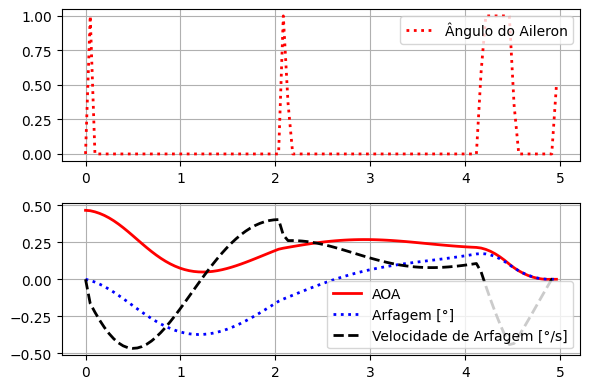

In [6]:
# Resultados


plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.plot(tm,w,'r:',lw=2,label='Aileron')
plt.grid(); plt.legend()
plt.subplot(2,1,2)
plt.plot(tm,x0,'r-',lw=2,label='AOA')
plt.plot(tm,x1,'b:',lw=2,label='Arfagem [°]')
plt.plot(tm,x2,'k--',lw=2,label='Velocidade de Arfagem [°/s]')
plt.grid(); plt.legend()
plt.savefig('aircraft.png',dpi=300);
plt.tight_layout(); plt.show()